<a href="https://colab.research.google.com/github/charlieswb/Learning/blob/master/Tensorflow/LogisticRegression_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense

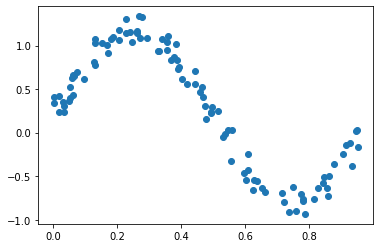

In [2]:
N = 100
X = np.random.rand(N, 1)
Y = np.sin(2 * np.pi * X) + 0.4 * np.random.rand(N, 1)
plt.scatter(X, Y)
plt.show()

Create Model

normal model

In [ ]:
# 1--100-100--1
inputs = Input(shape=(1,))
l1 = Dense(100, activation='relu')
l2 = Dense(100, activation='relu')
l3 = Dense(1)
outputs = l3(l2(l1(inputs)))

In [ ]:
model = keras.Model(inputs, outputs)
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), loss=keras.losses.MeanSquaredError())

using subclass

In [3]:
class NLRegressor(keras.Model):
  def __init__(self):
    super().__init__()
    self.l1 = Dense(100, activation='relu')
    self.l2 = Dense(100, activation='relu')
    self.l3 = Dense(1)
  def call(self, inputs):
    x = self.l1(inputs)
    x = self.l2(x)
    x = self.l3(x)
    return x

In [4]:
model  = NLRegressor()
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), loss=keras.losses.MeanSquaredError())

using sequential

In [ ]:
model = keras.Sequential()
model.add(Dense(100, activation='relu')) #l1
model.add(Dense(100, activation='relu')) #l2
model.add(Dense(1)) #l3
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), loss=keras.losses.MeanSquaredError())

Train

In [5]:
model.fit(X, Y, batch_size=32, epochs=500, verbose=0)

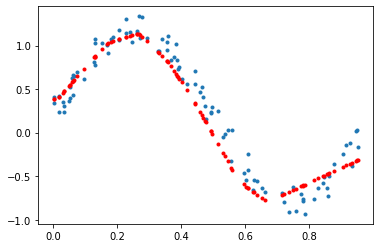

In [6]:
Z = model.predict(X)
plt.plot(X, Y, '.')
plt.plot(X, Z, '.r')
plt.show()

# **Classification**

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [8]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
X = df.iloc[:, 0:4].values
labels = df.iloc[:, -1]
Y = pd.get_dummies(labels).values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=33)
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Normal model

In [ ]:
# 4--100-100--3
inputs = Input(shape=(4,))
l1 = Dense(100, activation='relu')
l2 = Dense(100, activation='relu')
l3 = Dense(3)
outputs = l3(l2(l1(inputs)))
model = keras.Model(inputs, outputs)
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), loss=keras.losses.MeanSquaredError())

using subclass

In [9]:
class Classifier(keras.Model):
  def __init__(self):
    super().__init__()
    self.l1 = Dense(100, activation='relu')
    self.l2 = Dense(100, activation='relu')
    self.l3 = Dense(3)
  def call(self, inputs):
    x = self.l1(inputs)
    x = self.l2(x)
    x = self.l3(x)
    return x

In [10]:
model = Classifier()
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), loss=keras.losses.MeanSquaredError())

using sequential

In [ ]:
model = keras.Sequential()
model.add(Dense(100, activation='relu')) #l1
model.add(Dense(100, activation='relu')) #l2
model.add(Dense(3)) #l3
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), loss=keras.losses.MeanSquaredError())

train

In [11]:
model.fit(X_train, Y_train, epochs=500, verbose=0)

In [12]:
print('loss:', model.evaluate(X_test, Y_test))

3/3 [==============================] - 0s 3ms/step - loss: 0.0398
loss: 0.039779193699359894


Try KFold

In [15]:
from sklearn.model_selection import StratifiedKFold

best_model_loss = 1

kfold = StratifiedKFold(n_splits=2, shuffle=True)

for train_index,test_index in kfold.split(X, labels):
  X_train, X_test = X[train_index], X[test_index]
  Y_train, Y_test = Y[train_index], Y[test_index]
  
  model_iris = Classifier()
  model_iris.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), loss=keras.losses.MeanSquaredError()) 
  model_iris.fit(X_train, Y_train, epochs=500, verbose=0)
  
  loss = model_iris.evaluate(X_test, Y_test)
  if loss < best_model_loss:
    best_model = model_iris
    best_model_loss = loss
  print('loss:', loss)

3/3 [==============================] - 0s 3ms/step - loss: 0.0188
loss: 0.01880664750933647
3/3 [==============================] - 0s 4ms/step - loss: 0.0141
loss: 0.01409193966537714


In [16]:
best_model_loss

0.01409193966537714